In [1]:
from paddle.inference import Config
from PIL import Image

# 当模型文件夹下只有一个模型文件和一个参数文件时，即参数合并模式
# 传入模型文件和参数文件路径，默认文件名分别为__model__和__params__
config = Config("./inference_pede_r18/inference.pdmodel", "./inference_pede_r18/inference.pdiparams")

In [2]:

# 从paddle.inference中导入create_predictor类
from paddle.inference import create_predictor

# 使用create_predictor传入配置即可完成模型预测器的加载
predictor = create_predictor(config)

--- Running analysis [ir_graph_build_pass]
--- Running analysis [ir_graph_clean_pass]
--- Running analysis [ir_analysis_pass]
--- Running IR pass [simplify_with_basic_ops_pass]
--- Running IR pass [layer_norm_fuse_pass]
---    Fused 0 subgraphs into layer_norm op.
--- Running IR pass [attention_lstm_fuse_pass]
--- Running IR pass [seqconv_eltadd_relu_fuse_pass]
--- Running IR pass [seqpool_cvm_concat_fuse_pass]
--- Running IR pass [mul_lstm_fuse_pass]
--- Running IR pass [fc_gru_fuse_pass]
---    fused 0 pairs of fc gru patterns
--- Running IR pass [mul_gru_fuse_pass]
--- Running IR pass [seq_concat_fc_fuse_pass]
--- Running IR pass [squeeze2_matmul_fuse_pass]
--- Running IR pass [reshape2_matmul_fuse_pass]
--- Running IR pass [flatten2_matmul_fuse_pass]
--- Running IR pass [map_matmul_v2_to_mul_pass]
I1110 22:23:40.825285 76062208 fuse_pass_base.cc:57] ---  detected 10 subgraphs
--- Running IR pass [map_matmul_v2_to_matmul_pass]
--- Running IR pass [map_matmul_to_mul_pass]
--- Running

In [23]:
# 导入numpy
import numpy as np

def preprocess_image(image):
    mean = [0.484, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    return ((np.float32(image) / 255.) - mean) / std

# 创建随机数据
fake_input = np.random.randn(1, 3, 256, 256).astype("float32")

image = Image.open('image/2.jpg') # 打开的图片是PIL类型，默认RGB
iw, ih = image.size
h, w = 256, 128
# resize image
scale = min(w/iw, h/ih)
nw = int(iw*scale)
nh = int(ih*scale)
dx = (w-nw)//2
dy = (h-nh)//2

image_ori = image
image = image.resize((w,h))
#new_image = Image.new('RGB', (w,h), (128,128,128))
#new_image.paste(image, (dx, dy))
#image_data = np.array(image, np.float32)
image_data = np.array(image, np.float32)
image_ori = np.array(image_ori, np.float32)
ori_img = image_ori

# img = np.array(image_data, dtype=np.float32)[:,:,::-1] # RGB2BGR
img = np.array(image_data, dtype=np.float32)
img = np.transpose(preprocess_image(img), (2, 0, 1)) # 把C提到第一维度

fake_input = np.expand_dims(img, 0).astype("float32")

In [24]:
fake_input.dtype

dtype('float32')

In [25]:
# output_names

In [26]:
'''
    第一步
'''
# 获取输入的向量名称
input_names = predictor.get_input_names()

# 根据向量名称获取输入向量
# 因为演示模型只有一个输入向量
# 所以只需要获取第一个输入的向量名称对应的向量
input_handle = predictor.get_input_handle(input_names[0])

# 获取输出的向量名称
output_names = predictor.get_output_names()

# 根据向量名称获取输出向量
# 因为演示模型只有一个输出向量
# 所以只需要获取第一个输出的向量名称对应的向量
output_handle0 = predictor.get_output_handle(output_names[0]) # bbox
output_handle1 = predictor.get_output_handle(output_names[1]) # confidence
output_handle2 = predictor.get_output_handle(output_names[2]) # direction
output_handle3 = predictor.get_output_handle(output_names[3]) # gender
output_handle4 = predictor.get_output_handle(output_names[4]) # age
output_handle5 = predictor.get_output_handle(output_names[5]) # color_up
output_handle6 = predictor.get_output_handle(output_names[6]) # color_down

'''
    第二步
'''
# 拷贝数据到输入向量中
input_handle.copy_from_cpu(fake_input)

'''
    第三步
'''
# 使用预测器执行前向计算
predictor.run()

'''
    第四步
'''
# 将结果从输出向量中拷贝出来
# 拷贝出来的结果为numpy.ndarray类型

'\n    第四步\n'

In [27]:
output_data0 = output_handle0.copy_to_cpu()
output_data0

array([[34.497505  , -0.14714432, 82.13856   , 69.20198   ]],
      dtype=float32)

In [28]:
output_data1 = output_handle1.copy_to_cpu()
output_data1

array([[0.7412593]], dtype=float32)

In [29]:
output_data2 = output_handle2.copy_to_cpu()
print(output_data2) # 朝向，0：正，1：背，2：左，3：右

[1]


In [30]:
output_data3 = output_handle3.copy_to_cpu()
print(output_data3) # 性别，0：男，1：女，2：不确定

[1]


In [31]:
output_data4 = output_handle4.copy_to_cpu()
print(output_data4) # 年龄，0：0-6幼儿，1：6-12儿童，2：12-18少年，3：18-30青年，4：30-55中年，5：>55老年，6：不确定

[1]


In [32]:
output_data5 = output_handle5.copy_to_cpu()
print(output_data5) # 颜色，0：其他，1：黑，2：白，3：灰，4：红，5：黄，6：绿，7：蓝，8：紫，9：棕，10：粉，11：橙

[7]


In [33]:
output_data6 = output_handle6.copy_to_cpu()
print(output_data6) # 颜色，0：其他，1：黑，2：白，3：灰，4：红，5：黄，6：绿，7：蓝，8：紫，9：棕，10：粉，11：橙

[0]


In [34]:
import matplotlib.pyplot as plt
import numpy as np

def myimshow(
    img,
    title=None,
    show_shape=True,
    figsize=(5, 5)
):
    img = np.array(img)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img)
    ax.grid("off")
    ax.set_xticks([])
    ax.set_yticks([])

    if show_shape:
        ax.set_xlabel(f"Shape: {img.shape}", fontsize=16)
        
    if title:
        ax.set_title(title, fontsize=16)

    return ax

<AxesSubplot:xlabel='Shape: (152, 100, 3)'>

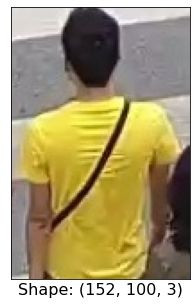

In [35]:
myimshow(ori_img/255)

In [36]:
left, up, right, down = output_data0[0]

In [37]:
left = max(0, int(left + 0.5))
up = max(0, int(up + 0.5))
right = max(0, int(right + 0.5))
down = max(0, int(down + 0.5))

In [38]:
leftt = int(left*iw/128)
upp = int(up*ih/256)
rightt = int(right*iw/128)
downn = int(down*ih/256)
print(leftt, upp, rightt, downn)

26 0 64 40


In [39]:
import cv2
ori_img = cv2.rectangle(ori_img, (leftt, upp), (rightt,downn), (255,0,0))

<AxesSubplot:xlabel='Shape: (152, 100, 3)'>

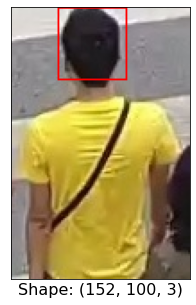

In [40]:
myimshow(ori_img/255)